In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Complexity

In [17]:
# data = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/current/AF_1step_pred_wuhan_v1_b2b_parse.csv')
data = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/current/ESM_1step_pred_wuhan_v1_b2b_03-07.csv')

In [18]:
c_list_all = data.columns.to_list()

Sorting on Site and Mutation (if necessary)

In [20]:
# Sort the data by 'wildtype' and 'site'
data = data.sort_values(by=['mutation', 'site'])
# Create a new column for combined mutation and site
data['mutation_site'] = data['mutation'] + data['site'].astype(str)

In [23]:
data

,seq_id,wildtype,site,mutation,rmsd,tm_score,sasa,avg_hydro,total_hydro,plddt,...,ppII,sheet,sidechain,bind,delta_bind,expr,delta_expr,confidence_bind,confidence_expr,mutation_site
2557,T1A,T,1,A,13.719652,0.401304,18218.480888,-0.237868,-0.210769,22.899416,...,0.078990,0.370241,0.575133,8.70879,-0.02454,10.01110,-0.17363,-0.788544,-1.079032,A1
2581,N2A,N,2,A,10.961031,0.708218,17180.669037,-0.231746,-0.196410,23.555844,...,0.078692,0.372887,0.575646,8.78958,0.01797,9.67349,-0.51239,0.072748,0.070400,A2
2559,L3A,L,3,A,11.175859,0.699317,17321.460960,-0.244293,-0.233846,23.657792,...,0.079656,0.372000,0.574959,8.81095,0.03934,10.23607,0.05019,0.072992,0.070893,A3
2258,C4A,C,4,A,13.786105,0.494928,18289.507768,-0.241875,-0.227179,22.774319,...,0.079364,0.370590,0.573995,7.90036,-0.87125,8.95448,-1.23139,0.072667,0.070400,A4
2279,P5A,P,5,A,12.579179,0.550989,17966.767695,-0.226909,-0.206154,22.839066,...,0.077133,0.372390,0.576215,8.66949,-0.10211,10.11112,-0.07476,0.075023,0.072494,A5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,T191Y,T,191,Y,14.220164,0.489571,17198.400375,-0.242026,-0.226667,22.579457,...,0.077979,0.374426,0.577118,8.57919,-0.23177,NaN,NaN,-1.649024,-2.227478,Y191
1220,V192Y,V,192,Y,2.034227,0.934504,17484.265978,-0.256387,-0.251795,23.284238,...,0.078774,0.372390,0.576226,NaN,NaN,NaN,NaN,-2.509504,-2.227478,Y192
1606,C193Y,C,193,Y,11.738843,0.548227,17441.170439,-0.248375,-0.243077,23.739832,...,0.078867,0.375010,0.575472,8.63525,-0.13635,9.77668,-0.40920,0.072504,0.070030,Y193
1607,G194Y,G,194,Y,11.301332,0.571474,18318.478145,-0.241119,-0.228205,22.858156,...,0.077615,0.375303,0.577231,8.55403,-0.21758,9.77376,-0.41212,0.071854,0.069291,Y194


In [56]:
# data = data.dropna()

In [22]:
# Find the start indices for each amino acid and ensure alphabetical order
amino_acids = sorted(data['mutation'].unique())
start_indices = [int(data[data['mutation'] == aa].index[0]) for aa in amino_acids]
data['mutation_site'] = data['mutation_site'].astype(str)
print(start_indices)

[2557, 2595, 2575, 2599, 2600, 2560, 2586, 2567, 2601, 2572, 2561, 2604, 2592, 2569, 2564, 2594, 2585, 2589, 2574, 2577]


In [24]:
values_to_remove = ['seq_id', 'wildtype', 'site', 'mutation', 'mutation_site', 'confidence_bind', 'confidence_expr']
c_list = [x for x in c_list_all if x not in values_to_remove]

In [25]:
data = data[c_list]
# data['pi_score'] = pd.to_numeric(data['pi_score'])

In [32]:
df_var = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/predictions/variants/esm/ESM_1step_variants.csv')
df_ref = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/references/esm/ESM_validation.csv')

In [33]:
# column_to_normalize = 'local_net_energy'
for column_to_normalize in c_list:
    print(column_to_normalize)
    min = data[column_to_normalize].min()
    max = data[column_to_normalize].max()
    data[column_to_normalize] = (data[column_to_normalize] - min) / (max - min)
    df_var[column_to_normalize] = (df_var[column_to_normalize] - min) / (max - min)
    df_ref[column_to_normalize] = (df_ref[column_to_normalize] - min) / (max - min)

rmsd
tm_score
sasa
avg_hydro
total_hydro


/var/folders/mh/w45hs15d1ysft1pnb5mdmq4c0000gn/T/ipykernel_81736/542606812.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_to_normalize] = (data[column_to_normalize] - min) / (max - min)


KeyError: 'total_hydro'

In [117]:
complex_list = ['BDM', 'Shannon Entropy', 'LZW ratio']

In [27]:
print(data)

          rmsd  tm_score      sasa  avg_hydro  total_hydro     plddt  \
2557  0.617829  0.192630  0.735120   0.546224     0.774109  0.056513   
2581  0.471976  0.634856  0.602587   0.606977     0.871416  0.089863   
2559  0.483335  0.622030  0.620566   0.482470     0.617724  0.095042   
2258  0.621343  0.327531  0.744191   0.506471     0.662902  0.050158   
2279  0.557531  0.408307  0.702975   0.654980     0.805387  0.053447   
...        ...       ...       ...        ...          ...       ...   
1231  0.644292  0.319811  0.604851   0.504971     0.666377  0.040258   
1220  0.000000  0.960906  0.641357   0.362463     0.496090  0.076064   
1606  0.513101  0.404328  0.635854   0.441968     0.555169  0.099210   
1607  0.489969  0.437824  0.747890   0.513972     0.655951  0.054417   
1154  0.642112  0.268426  0.758782   0.529723     0.697654  0.032873   

      local_net_energy  global_net_energy    agmata  backbone  ...  disoMine  \
2557          0.629250           0.629250  0.381075  0.

In [29]:
# Function to plot RMSD
def plot_rmsd(data, x_column, y_column, save_path):
    plt.figure(figsize=(15, 8))  # Increase the figure size
    plt.plot(data['mutation_site'], data[y_column], marker='o', markersize=1.5, linestyle='-', color='b', linewidth=0.5, label='Data')
    # plt.plot(data[x_column], data[y_column], marker='o', linestyle='None', markersize=1.5, color='b', linewidth=0.5, label='Data')
    
    plt.axhline(y=wildtype, color='r', linestyle='--', label='Wildtype')  # Add a horizontal line for the wildtype value
    plt.text(len(data['mutation_site']) - 1, wildtype, 'Wildtype', color='r', va='bottom', ha='left')

    # Highlight parameters
    # highlight_indices = [3682, 2719, 1633]
    highlight_indices = [1672, 3031, 3531]
    highlight_labels = ['Alpha', 'Epsilon', 'Eta/Iota']
    highlight_colors = ['red', 'green', 'orange']

    # Highlight the special points
    for i, idx in enumerate(highlight_indices):
        point_x = data[x_column].iloc[idx]
        point_y = data[y_column].iloc[idx]
        plt.plot(point_x, point_y, marker='o', color=highlight_colors[i], linestyle='None')  # Use specific color
        plt.text(point_x, point_y, highlight_labels[i], fontsize=12, ha='right', weight='bold')  # Add label

    # Set labels and title
    plt.xlabel(f'{x_column}')
    plt.ylabel(f'{y_column}')
    plt.title(f'{x_column} vs {y_column} for 1-step Mutational Variants')

    # Adjust x-axis labels to show only the start of each amino acid
    # plt.xticks(ticks=start_indices, labels=amino_acids, rotation=90, fontsize=8)
    
    # Display the plot
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, format='png', dpi=300)
        print(f"Plot saved to {save_path}")

    plt.show()

In [30]:
# data_type = '1_Hot_20_Bits'
for y_column in c_list:
    print(y_column)
    for x_column in complex_list:
        save_path = f'/home/max/stayahead/analysis/datasets/complexity/plots/ESM/ESM_{x_column}_{y_column}_plot.png'
        plot_rmsd(data, x_column, y_column, save_path)

rmsd


NameError: name 'complex_list' is not defined

In [3]:
df = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/predict/train_1/diff/AF_BA1_100_predict_deltas.csv')

In [ ]:
dir = '/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/predict/train_1/diff'
save_dir = '/Users/maxvandenboom/stayahead/analysis/plots/predictions/rank_diff/train_1'
for file in os.listdir(dir):
    if file.endswith('.csv'):
        df = pd.read_csv(f'{dir}/{file}')
        name = os.path.splitext(file)[0]
        type = name.split('_')[-1]
        al_type = name.split('_')[0]
        v_type = name.split('_')[1]
        if type == 'deltas':
            columns_to_plot = [
                ('difference_bind', 'rank_diff_bind', 'Difference Bind', 'Rank Difference Bind'),
                ('difference_delta_bind', 'rank_diff_delta_bind', 'Difference Delta Bind', 'Rank Difference Delta Bind'),
                ('difference_expr', 'rank_diff_expr', 'Difference Expr', 'Rank Difference Expr'),
                ('difference_delta_expr', 'rank_diff_delta_expr', 'Difference Delta Expr', 'Rank Difference Delta Expr')
            ]
        elif type == 'predict':
            columns_to_plot = [
                ('difference_bind', 'rank_diff_bind', 'Difference Bind', 'Rank Difference Bind'),
                ('difference_expr', 'rank_diff_expr', 'Difference Expr', 'Rank Difference Expr'),
            ]
            # Create scatter plots for each pair
        for diff_col, rank_col, diff_name, rank_name in columns_to_plot:
            # Sort the DataFrame based on the difference column in ascending order
            sorted_df = df.sort_values(by=diff_col)

            # Create the scatter plot
            plt.figure(figsize=(10, 6))
            plt.scatter(sorted_df[diff_col], sorted_df[rank_col], c='blue', label=f'{diff_name} vs {rank_name}')
            plt.title(f'{al_type} {v_type} predictions: {diff_name} vs {rank_name}')
            if diff_name.split(' ')[-1] == 'Bind':
                plt.xlabel(f'{diff_name} (kd)')
            else:
                plt.xlabel(diff_name)
            plt.ylabel(rank_name)
            plt.legend()
            plt.grid(True)
            save_path = os.path.join(save_dir, f'{al_type}_{v_type}_{type}_{diff_name}_{rank_name}.png')
            if save_path:
                plt.savefig(save_path, format='png', dpi=300)
                print(f"Plot saved to {save_path}")
            plt.show()

In [13]:
df = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/predict/train/rankings/ESM_BA1_100_predict_deltas.csv')
df_filtered = df[(df['rank_diff_bind'] <= 20) & (df['rank_diff_bind'] >= -20)]

In [16]:
df_filtered['rank_predicted_bind'].mean()

49.10344827586207

In [ ]:
# Define the pairs of columns for plotting
columns_to_plot = [
    ('difference_bind', 'rank_diff_bind', 'Difference Bind', 'Rank Difference Bind'),
    ('difference_delta_bind', 'rank_diff_delta_bind', 'Difference Delta Bind', 'Rank Difference Delta Bind'),
    ('difference_expr', 'rank_diff_expr', 'Difference Expr', 'Rank Difference Expr'),
    ('difference_delta_expr', 'rank_diff_delta_expr', 'Difference Delta Expr', 'Rank Difference Delta Expr')
]

# Create scatter plots for each pair
for diff_col, rank_col, diff_name, rank_name in columns_to_plot:
    # Sort the DataFrame based on the difference column in ascending order
    sorted_df = df.sort_values(by=diff_col)

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(sorted_df[diff_col], sorted_df[rank_col], c='blue', label=f'{diff_name} vs {rank_name}')
    plt.title(f'Scatter Plot: {diff_name} vs {rank_name}')
    plt.xlabel(f'{diff_name} (kd)')
    plt.ylabel(rank_name)
    plt.legend()
    plt.grid(True)
    plt.show()

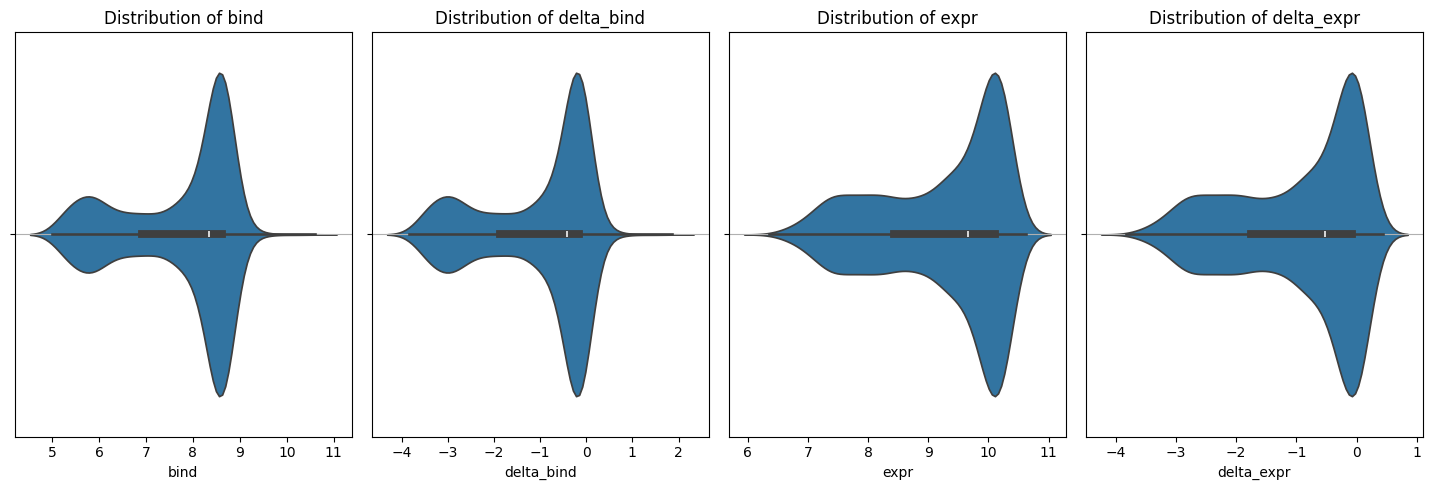

In [24]:
import math
# Load your dataset
# Assuming your CSV has columns like 'RMSD', 'Solvent Accessible Surface', etc.
df = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/current/AF_1step_pred_wuhan_v1_b2b_parse.csv')

# List of metrics you want to plot
c_list_all = df.columns.to_list()
values_to_remove = ['seq_id', 'wildtype', 'site', 'mutation', 'global_net_energy', 'total_hydro', 'pi_score' ,'bind', 'delta_bind', 'expr', 'delta_expr', 'confidence_bind', 'confidence_expr']
# values_to_remove = ['seq_id', 'wildtype', 'site', 'mutation', 'global_net_energy', 'total_hydro', 'pi_score' ,'bind', 'delta_bind', 'expr', 'delta_expr', 'confidence_bind', 'confidence_expr']
# metrics = [x for x in c_list_all if x not in values_to_remove]
metrics = ['bind', 'delta_bind', 'expr', 'delta_expr']

# Number of metrics
num_metrics = len(metrics)

# Number of columns and rows
num_cols = 5
num_rows = math.ceil(num_metrics / num_cols)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 5 * num_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Create individual violin plots for each metric
for i, metric in enumerate(metrics):
    sns.violinplot(data=df, x=metric, ax=axes[i], bw_method=0.2)
    axes[i].set_title(f'Distribution of {metric}')
    axes[i].set_xlabel(metric)
    axes[i].grid(True, axis='y')  # Add horizontal grid lines

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [20]:
data = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/current/AF_1step_pred_wuhan_v1_b2b_parse.csv') #AF
# data = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/current/ESM_1step_pred_wuhan_v1_b2b_03-07.csv') #ESM

In [16]:
# Select the columns to be normalized
columns_to_normalize = ['rmsd', 'tm_score', 'plddt', 'sasa', 'avg_hydro', 'local_net_energy', 'agmata', 'backbone', 'coil', 'sheet'
                        , 'disoMine', 'earlyFolding', 'helix', 'ppII', 'bind', 'expr']

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [ ]:
# Create the 3D plot
fig = go.Figure(data=[go.Scatter3d(
    x=data['bind'],
    y=data['expr'],
    z=data['rmsd'],
    mode='markers',
    marker=dict(
        size=5,
        color=data['rmsd'],  # Set color to bind values
        colorscale='Viridis',  # Choose a colorscale
        opacity=0.8
    )
)])

# Set the title and axis labels
fig.update_layout(
    title='3D Scatter Plot of RMSD vs Bind vs Expr',
    scene=dict(
        xaxis=dict(title='Bind'),
        yaxis=dict(title='Expression'),
        zaxis=dict(title='RMSD')
    ),
    width=1200,  # Set the width of the plot
    height=1000   # Set the height of the plot
)

# Show the plot
fig.show()

In [ ]:
# Directory to save the plots
save_dir = '/Users/maxvandenboom/stayahead/analysis/plots/metrics/feat_4_abs/af'
os.makedirs(save_dir, exist_ok=True)

# List of feature combinations to plot
feature_combinations = [
    # ('expr', 'bind', 'rmsd'),
    ('expr', 'bind', 'tm_score', 'TM-Score'),
    ('expr', 'bind', 'plddt', 'plDDT'),
    ('expr', 'bind', 'sasa', 'SASA'),
    ('expr', 'bind', 'avg_hydro', 'Average Hydrophobicity'),
    ('expr', 'bind', 'local_net_energy', 'Electrostatic Potential'),
    ('expr', 'bind', 'agmata', 'Agmata'),
    ('expr', 'bind', 'backbone', 'Backbone'),
    ('expr', 'bind', 'coil', 'Coil'),
    ('expr', 'bind', 'sheet', 'Sheet'),
    ('expr', 'bind', 'disoMine', 'disoMine'),
    ('expr', 'bind', 'earlyFolding', 'earlyFolding'),
    ('expr', 'bind', 'helix', 'Helix'),
    ('expr', 'bind', 'ppII', 'ppII'),
    # Add more combinations as needed
]

# Define font sizes
title_fontsize = 20
axis_label_fontsize = 15
tick_label_fontsize = 12

for features in feature_combinations:
    x_feature, y_feature, z_feature, name = features
    color_feature = 'rmsd'

    # Create a new figure for each plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the data
    sc = ax.scatter(data[x_feature], data[y_feature], data[z_feature], c=data[color_feature], cmap='viridis', marker='o')
    # Set axis labels
    ax.set_xlabel(f'Normalized {x_feature}')
    ax.set_ylabel(f'Normalized {y_feature}')
    ax.set_zlabel(f'Normalized {z_feature}')

    # Set title
    ax.set_title(f'AF 3D Scatter Plot of Experimental Values vs {name} with RMSD')

        # Set tick label font size
    ax.tick_params(axis='x', labelsize=tick_label_fontsize)
    ax.tick_params(axis='y', labelsize=tick_label_fontsize)
    ax.tick_params(axis='z', labelsize=tick_label_fontsize)

    # Add a color bar
    cbar = plt.colorbar(sc, ax=ax, shrink=0.3, aspect=5)
    cbar.set_label(f'{color_feature}', fontsize=axis_label_fontsize)
    cbar.ax.tick_params(labelsize=tick_label_fontsize)

    # Save the plot
    plot_filename = f'AF_{x_feature}_vs_{y_feature}_vs_{z_feature}_with_{color_feature}_color.png'
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, plot_filename))

    plt.show()
    # Close the plot to free up memory
    plt.close(fig)

print(f'Plots saved in directory: {save_dir}')

In [52]:
data = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/current/AF_1step_pred_wuhan_v1_b2b_parse.csv') #AF
data2 = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/current/ESM_1step_pred_wuhan_v1_b2b_03-07.csv') #ESM

# Fit and transform the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data2[columns_to_normalize] = scaler.fit_transform(data2[columns_to_normalize])

In [54]:
# Normalize the 'bind' and 'expr' columns
data['bind_norm'] = (data['bind'] - data['bind'].min()) / (data['bind'].max() - data['bind'].min())
data['expr_norm'] = (data['expr'] - data['expr'].min()) / (data['expr'].max() - data['expr'].min())

# Create a combined score by averaging the normalized 'bind' and 'expr' values
data['combined_score'] = (data['bind_norm'] + data['expr_norm']) / 2

# Create a combined score by averaging the normalized 'bind' and 'expr' values
data2['combined_score'] = (data['bind_norm'] + data['expr_norm']) / 2


In [ ]:
save_dir = '/Users/maxvandenboom/stayahead/analysis/plots/metrics/combined'
for feature in columns_to_normalize:
    # plt.figure(figsize=(14, 7))

    # # Scatter plot for combined score vs rmsd
    # plt.subplot(1, 2, 1)
    # plt.scatter(data[feature], data['combined_score'], alpha=0.5)
    # plt.xlabel(f'{feature}')
    # plt.ylabel('Bind-Expr Score')
    # plt.title(f'Combined Score vs {feature}')

    # # Scatter plot for combined score vs sasa
    # plt.subplot(1, 2, 2)
    # plt.scatter(data2[feature], data2['combined_score'], alpha=0.5)
    # plt.xlabel(f'{feature}')
    # plt.ylabel('Bind-Expr Score')
    # plt.title(f'Combined Score vs {feature}')

    # Create the plots with a single title in the middle
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    # Scatter plot for combined score vs rmsd
    axes[0].scatter(data[feature], data['combined_score'], alpha=0.5)
    axes[0].set_xlabel(f'{feature}')
    axes[0].set_ylabel('Bind-Expr Score')
    axes[0].set_title('AlphaFold-2')

    # Scatter plot for combined score vs sasa
    axes[1].scatter(data2[feature], data2['combined_score'], alpha=0.5)
    axes[1].set_xlabel(f'{feature}')
    axes[1].set_ylabel('Bind-Expr Score')
    axes[1].set_title('ESMFold')


    # Add a main title for the entire figure
    fig.suptitle(f'Relationship of Combined Binding & Expression Score with {feature}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title

    plot_filename = f'{feature}_vs_expr_bind_score.png'
    plt.savefig(os.path.join(save_dir, plot_filename))
    plt.show()

In [4]:
data_train_1_AF = {
    "Model": ["AF-deltas", "AF"],
    "Avg. tree depth": [7, 10],
    "Avg. # Nodes": [104.525, 173.3],
    "Avg. # Leaves": [52.763, 87.15],
    "Avg. Leaf Impurity": [3.778, 2.657]
}

data_train_1_ESM = {
    "Model": ["ESM-deltas", "ESM"],
    "Avg. tree depth": [13.998, 11],
    "Avg. # Nodes": [321.52, 261.63],
    "Avg. # Leaves": [161.26, 131.315],
    "Avg. Leaf Impurity": [2.325, 1.841]
}

data_train_2_AF = {
    "Model": ["AF-deltas", "AF"],
    "Avg. tree depth": [8, 7],
    "Avg. # Nodes": [131.935, 97.74],
    "Avg. # Leaves": [66.468, 49.37],
    "Avg. Leaf Impurity": [3.668, 9.488]
}

data_train_2_ESM = {
    "Model": ["ESM-deltas", "ESM"],
    "Avg. tree depth": [11, 12.905],
    "Avg. # Nodes": [545.855, 230.260],
    "Avg. # Leaves": [273.428, 115.630],
    "Avg. Leaf Impurity": [1.098, 3.182]
}

df_train_1_AF = pd.DataFrame(data_train_1_AF)
df_train_1_ESM = pd.DataFrame(data_train_1_ESM)
df_train_2_AF = pd.DataFrame(data_train_2_AF)
df_train_2_ESM = pd.DataFrame(data_train_2_ESM)

In [85]:
c_norm = ['Avg. tree depth', 'Avg. # Nodes', 'Avg. # Leaves', 'Avg. Leaf Impurity']
# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df_train_1[c_norm] = scaler.fit_transform(df_train_1[c_norm])

In [ ]:
# Create a new figure for each plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

marker_size = 50

# Define font sizes
title_fontsize = 20
axis_label_fontsize = 15
tick_label_fontsize = 12

all_leaf_impurities = pd.concat([
    df_train_1_AF['Avg. Leaf Impurity'], 
    df_train_1_ESM['Avg. Leaf Impurity'], 
    df_train_2_AF['Avg. Leaf Impurity'], 
    df_train_2_ESM['Avg. Leaf Impurity']
])

vmin = all_leaf_impurities.min()
vmax = all_leaf_impurities.max()

# Plot the data
sc_af = ax.scatter(df_train_1_AF['Avg. tree depth'], df_train_1_AF['Avg. # Nodes'], df_train_1_AF['Avg. # Leaves'], c=df_train_1_AF['Avg. Leaf Impurity'], 
                cmap='viridis', marker='o', edgecolors='k', linewidths=0.5, s=marker_size, label='Train 1 - AF', vmin=vmin, vmax=vmax)

sc_esm = ax.scatter(df_train_1_ESM['Avg. tree depth'], df_train_1_ESM['Avg. # Nodes'], df_train_1_ESM['Avg. # Leaves'], c=df_train_1_ESM['Avg. Leaf Impurity'], 
                cmap='viridis', marker='*', edgecolors='k', linewidths=0.5, s=marker_size, label='Train 1 - ESM', vmin=vmin, vmax=vmax)

# Plot the data for Train 2
sc2_af = ax.scatter(df_train_2_AF['Avg. tree depth'], df_train_2_AF['Avg. # Nodes'], df_train_2_AF['Avg. # Leaves'], c=df_train_2_AF['Avg. Leaf Impurity'], 
                 cmap='plasma', marker='^', s=marker_size, edgecolors='k', linewidths=0.5, label='Train 2 - AF', vmin=vmin, vmax=vmax)

sc2_esm = ax.scatter(df_train_2_ESM['Avg. tree depth'], df_train_2_ESM['Avg. # Nodes'], df_train_2_ESM['Avg. # Leaves'], c=df_train_2_ESM['Avg. Leaf Impurity'], 
                 cmap='plasma', marker='p', s=marker_size, edgecolors='k', linewidths=0.5, label='Train 2 - ESM', vmin=vmin, vmax=vmax)

# # Add lines to x-, y-, and z-planes
# for i in range(len(df_train_1_AF)):
#     ax.plot([df_train_1_AF['Avg. tree depth'].iloc[i]]*2, 
#             [df_train_1_AF['Avg. # Nodes'].iloc[i], df_train_1_AF['Avg. # Nodes'].iloc[i]], 
#             [0, df_train_1_AF['Avg. # Leaves'].iloc[i]], color='gray', linestyle='--', linewidth=0.5)
#     ax.plot([df_train_1_AF['Avg. tree depth'].iloc[i], df_train_1_AF['Avg. tree depth'].iloc[i]], 
#             [0, df_train_1_AF['Avg. # Nodes'].iloc[i]], 
#             [df_train_1_AF['Avg. # Leaves'].iloc[i]]*2, color='gray', linestyle='--', linewidth=0.5)
#     ax.plot([0, df_train_1_AF['Avg. tree depth'].iloc[i]], 
#             [df_train_1_AF['Avg. # Nodes'].iloc[i]]*2, 
#             [df_train_1_AF['Avg. # Leaves'].iloc[i]]*2, color='gray', linestyle='--', linewidth=0.5)

# for i in range(len(df_train_1_ESM)):
#     ax.plot([df_train_1_ESM['Avg. tree depth'].iloc[i]]*2, 
#             [df_train_1_ESM['Avg. # Nodes'].iloc[i], df_train_1_ESM['Avg. # Nodes'].iloc[i]], 
#             [0, df_train_1_ESM['Avg. # Leaves'].iloc[i]], color='gray', linestyle='--', linewidth=0.5)
#     ax.plot([df_train_1_ESM['Avg. tree depth'].iloc[i], df_train_1_ESM['Avg. tree depth'].iloc[i]], 
#             [0, df_train_1_ESM['Avg. # Nodes'].iloc[i]], 
#             [df_train_1_ESM['Avg. # Leaves'].iloc[i]]*2, color='gray', linestyle='--', linewidth=0.5)
#     ax.plot([0, df_train_1_ESM['Avg. tree depth'].iloc[i]], 
#             [df_train_1_ESM['Avg. # Nodes'].iloc[i]]*2, 
#             [df_train_1_ESM['Avg. # Leaves'].iloc[i]]*2, color='gray', linestyle='--', linewidth=0.5)

# for i in range(len(df_train_2_AF)):
#     ax.plot([df_train_2_AF['Avg. tree depth'].iloc[i]]*2, 
#             [df_train_2_AF['Avg. # Nodes'].iloc[i], df_train_2_AF['Avg. # Nodes'].iloc[i]], 
#             [0, df_train_2_AF['Avg. # Leaves'].iloc[i]], color='gray', linestyle='--', linewidth=0.5)
#     ax.plot([df_train_2_AF['Avg. tree depth'].iloc[i], df_train_2_AF['Avg. tree depth'].iloc[i]], 
#             [0, df_train_2_AF['Avg. # Nodes'].iloc[i]], 
#             [df_train_2_AF['Avg. # Leaves'].iloc[i]]*2, color='gray', linestyle='--', linewidth=0.5)
#     ax.plot([0, df_train_2_AF['Avg. tree depth'].iloc[i]], 
#             [df_train_2_AF['Avg. # Nodes'].iloc[i]]*2, 
#             [df_train_2_AF['Avg. # Leaves'].iloc[i]]*2, color='gray', linestyle='--', linewidth=0.5)

# for i in range(len(df_train_2_ESM)):
#     ax.plot([df_train_2_ESM['Avg. tree depth'].iloc[i]]*2, 
#             [df_train_2_ESM['Avg. # Nodes'].iloc[i], df_train_2_ESM['Avg. # Nodes'].iloc[i]], 
#             [0, df_train_2_ESM['Avg. # Leaves'].iloc[i]], color='gray', linestyle='--', linewidth=0.5)
#     ax.plot([df_train_2_ESM['Avg. tree depth'].iloc[i], df_train_2_ESM['Avg. tree depth'].iloc[i]], 
#             [0, df_train_2_ESM['Avg. # Nodes'].iloc[i]], 
#             [df_train_2_ESM['Avg. # Leaves'].iloc[i]]*2, color='gray', linestyle='--', linewidth=0.5)
#     ax.plot([0, df_train_2_ESM['Avg. tree depth'].iloc[i]], 
#             [df_train_2_ESM['Avg. # Nodes'].iloc[i]]*2, 
#             [df_train_2_ESM['Avg. # Leaves'].iloc[i]]*2, color='gray', linestyle='--', linewidth=0.5)

# Set axis labels
ax.set_xlabel('Avg. Tree Depth')
ax.set_ylabel('Avg. # of Nodes')
ax.set_zlabel('Avg. # of Leaves')

# Set title
ax.set_title(f'3D Scatter Plot XGB Tree Complexity Metrics')

    # Set tick label font size
ax.tick_params(axis='x', labelsize=tick_label_fontsize)
ax.tick_params(axis='y', labelsize=tick_label_fontsize)
ax.tick_params(axis='z', labelsize=tick_label_fontsize)

# Add a color bar
cbar = plt.colorbar(sc_af, ax=ax, shrink=0.3, aspect=5)
cbar.set_label('Avg. Leaf Impurity', fontsize=tick_label_fontsize)
cbar.ax.tick_params(labelsize=tick_label_fontsize)

# Add legend
ax.legend()

plt.tight_layout()
plt.savefig('/Users/maxvandenboom/stayahead/analysis/plots/xgb/ESM')
plt.show()

In [6]:
data_train_1_AF_2 = {
    "Model": ["AF"],
    "Avg. tree depth": [10],
    "Avg. # Nodes": [173.3],
    "Avg. # Leaves": [87.15],
    "Avg. Leaf Impurity": [2.657]
}

data_train_1_AF_4 = {
    "Model": ["AF-deltas"],
    "Avg. tree depth": [7],
    "Avg. # Nodes": [104.525],
    "Avg. # Leaves": [52.763],
    "Avg. Leaf Impurity": [3.778]
}

data_train_1_ESM_2 = {
    "Model": ["ESM"],
    "Avg. tree depth": [11],
    "Avg. # Nodes": [261.63],
    "Avg. # Leaves": [131.315],
    "Avg. Leaf Impurity": [1.841]
}

data_train_1_ESM_4 = {
    "Model": ["ESM-deltas"],
    "Avg. tree depth": [13.998],
    "Avg. # Nodes": [321.52],
    "Avg. # Leaves": [161.26],
    "Avg. Leaf Impurity": [2.325]
}

data_train_2_AF_2 = {
    "Model": ["AF"],
    "Avg. tree depth": [7],
    "Avg. # Nodes": [97.74],
    "Avg. # Leaves": [49.37],
    "Avg. Leaf Impurity": [9.488]
}

data_train_2_AF_4 = {
    "Model": ["AF-deltas"],
    "Avg. tree depth": [8],
    "Avg. # Nodes": [131.935],
    "Avg. # Leaves": [66.468],
    "Avg. Leaf Impurity": [3.668]
}

data_train_2_ESM_2 = {
    "Model": ["ESM"],
    "Avg. tree depth": [12.905],
    "Avg. # Nodes": [230.260],
    "Avg. # Leaves": [115.630],
    "Avg. Leaf Impurity": [3.182]
}

data_train_2_ESM_4 = {
    "Model": ["ESM-deltas"],
    "Avg. tree depth": [11],
    "Avg. # Nodes": [545.855],
    "Avg. # Leaves": [273.428],
    "Avg. Leaf Impurity": [1.098]
}

df_train_1_AF_2 = pd.DataFrame(data_train_1_AF_2)
df_train_1_AF_4 = pd.DataFrame(data_train_1_AF_4)
df_train_1_ESM_2 = pd.DataFrame(data_train_1_ESM_2)
df_train_1_ESM_4 = pd.DataFrame(data_train_1_ESM_4)
df_train_2_AF_2 = pd.DataFrame(data_train_2_AF_2)
df_train_2_AF_4 = pd.DataFrame(data_train_2_AF_4)
df_train_2_ESM_2 = pd.DataFrame(data_train_2_ESM_2)
df_train_2_ESM_4 = pd.DataFrame(data_train_2_ESM_4)

leaf_impurities_2 = pd.concat([
    df_train_1_AF_2['Avg. Leaf Impurity'], 
    df_train_1_ESM_2['Avg. Leaf Impurity'], 
    df_train_2_AF_2['Avg. Leaf Impurity'], 
    df_train_2_ESM_2['Avg. Leaf Impurity']
])

leaf_impurities_4 = pd.concat([
    df_train_1_AF_4['Avg. Leaf Impurity'], 
    df_train_1_ESM_4['Avg. Leaf Impurity'], 
    df_train_2_AF_4['Avg. Leaf Impurity'], 
    df_train_2_ESM_4['Avg. Leaf Impurity']
])

vmin = leaf_impurities_2.min()
vmax = leaf_impurities_2.max()

In [7]:
leaf_impurities_4

0    3.778
0    2.325
0    3.668
0    1.098
Name: Avg. Leaf Impurity, dtype: float64

In [ ]:
# Create the 3D plot
fig = go.Figure()

# Define marker sizes and shapes
marker_size = 8
marker_shapes = ['circle', 'cross', 'diamond', 'square']

# # Add Train 1 - AF
# fig.add_trace(go.Scatter3d(
#     x=df_train_1_AF_2['Avg. tree depth'],
#     y=df_train_1_AF_2['Avg. # Nodes'],
#     z=df_train_1_AF_2['Avg. # Leaves'],
#     mode='markers',
#     marker=dict(
#         size=marker_size,
#         symbol=marker_shapes[0],
#         color=df_li_all['Avg. Leaf Impurity'][0],
#         colorscale='Viridis',
#         colorbar=dict(title='Avg. Leaf Impurity'),
#         opacity=0.8,
#         line=dict(color='black', width=1)
#     ),
#     name='Train 1 - AF'
# ))

# Add Train 1 - AF-deltas
fig.add_trace(go.Scatter3d(
    x=df_train_1_AF_4['Avg. tree depth'],
    y=df_train_1_AF_4['Avg. # Nodes'],
    z=df_train_1_AF_4['Avg. # Leaves'],
    mode='markers',
    marker=dict(
        size=marker_size,
        symbol=marker_shapes[0],
        color=df_train_1_AF_4['Avg. Leaf Impurity'],
        colorscale='Viridis',
        opacity=0.8,
        line=dict(color='black', width=1)
    ),
    name='Train 1 - AF-deltas'
))

# # Add Train 1 - ESM
# fig.add_trace(go.Scatter3d(
#     x=df_train_1_ESM_2['Avg. tree depth'],
#     y=df_train_1_ESM_2['Avg. # Nodes'],
#     z=df_train_1_ESM_2['Avg. # Leaves'],
#     mode='markers',
#     marker=dict(
#         size=marker_size,
#         symbol=marker_shapes[2],
#         color=df_li_all['Avg. Leaf Impurity'][2],
#         colorscale='Viridis',
#         opacity=0.8,
#         line=dict(color='black', width=1)
#     ),
#     name='Train 1 - ESM'
# ))

# Add Train 1 - ESM-deltas
fig.add_trace(go.Scatter3d(
    x=df_train_1_ESM_4['Avg. tree depth'],
    y=df_train_1_ESM_4['Avg. # Nodes'],
    z=df_train_1_ESM_4['Avg. # Leaves'],
    mode='markers',
    marker=dict(
        size=marker_size,
        symbol=marker_shapes[1],
        color=df_train_1_ESM_4['Avg. Leaf Impurity'],
        colorscale='Viridis',
        opacity=0.8,
        line=dict(color='black', width=1)
    ),
    name='Train 1 - ESM-deltas'
))

# # Add Train 2 - AF
# fig.add_trace(go.Scatter3d(
#     x=df_train_2_AF_2['Avg. tree depth'],
#     y=df_train_2_AF_2['Avg. # Nodes'],
#     z=df_train_2_AF_2['Avg. # Leaves'],
#     mode='markers',
#     marker=dict(
#         size=marker_size,
#         symbol=marker_shapes[4],
#         color=df_li_all['Avg. Leaf Impurity'][4],
#         colorscale='Viridis',
#         opacity=0.8,
#         line=dict(color='black', width=1)
#     ),
#     name='Train 2 - AF'
# ))

# Add Train 2 - AF-deltas
fig.add_trace(go.Scatter3d(
    x=df_train_2_AF_4['Avg. tree depth'],
    y=df_train_2_AF_4['Avg. # Nodes'],
    z=df_train_2_AF_4['Avg. # Leaves'],
    mode='markers',
    marker=dict(
        size=marker_size,
        symbol=marker_shapes[2],
        color=df_train_2_AF_4['Avg. Leaf Impurity'],
        colorscale='Viridis',
        opacity=0.8,
        line=dict(color='black', width=1)
    ),
    name='Train 2 - AF-deltas'
))

# # Add Train 2 - ESM
# fig.add_trace(go.Scatter3d(
#     x=df_train_2_ESM_2['Avg. tree depth'],
#     y=df_train_2_ESM_2['Avg. # Nodes'],
#     z=df_train_2_ESM_2['Avg. # Leaves'],
#     mode='markers',
#     marker=dict(
#         size=marker_size,
#         symbol=marker_shapes[6],
#         color=df_li_all['Avg. Leaf Impurity'][6],
#         colorscale='Viridis',
#         opacity=0.8,
#         line=dict(color='black', width=1)
#     ),
#     name='Train 2 - ESM'
# ))

# Add Train 2 - ESM-deltas
fig.add_trace(go.Scatter3d(
    x=df_train_2_ESM_4['Avg. tree depth'],
    y=df_train_2_ESM_4['Avg. # Nodes'],
    z=df_train_2_ESM_4['Avg. # Leaves'],
    mode='markers',
    marker=dict(
        size=marker_size,
        symbol=marker_shapes[3],
        color=df_train_2_ESM_4['Avg. Leaf Impurity'],
        colorscale='Viridis',
        opacity=0.8,
        line=dict(color='black', width=1)
    ),
    name='Train 2 - ESM-deltas'
))

# Set the title and axis labels
fig.update_layout(
    title='3D Scatter Plot XGB Tree Complexity Metrics',
    scene=dict(
        xaxis=dict(title='Avg. Tree Depth'),
        yaxis=dict(title='Avg. # of Nodes'),
        zaxis=dict(title='Avg. # of Leaves')
    ),
    width=1200,  # Set the width of the plot
    height=1000  # Set the height of the plot
)

# Show the plot
fig.show()